# Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
abalone=pd.read_csv("abalone.csv")
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


input and out put variables-------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

In [3]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()

In [5]:
abalone["Sex"] = le.fit_transform(abalone["Sex"])
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


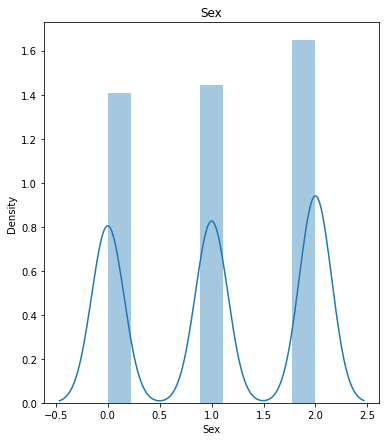

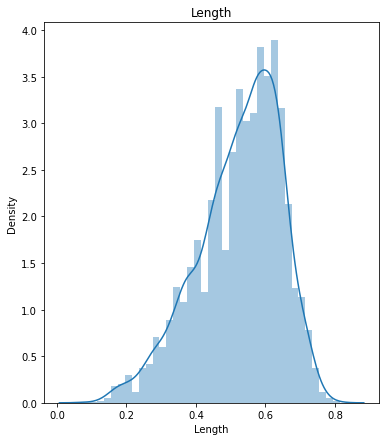

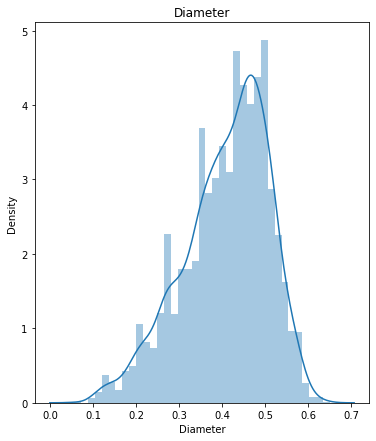

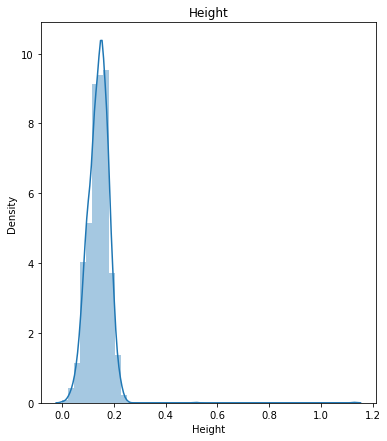

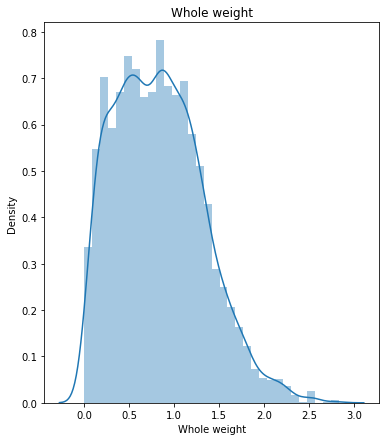

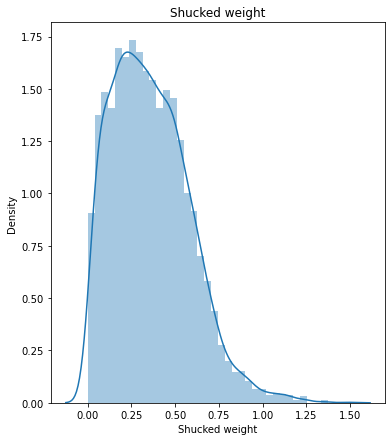

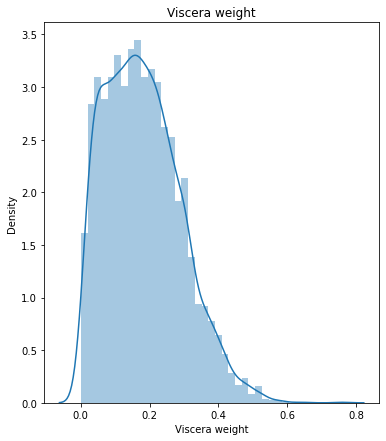

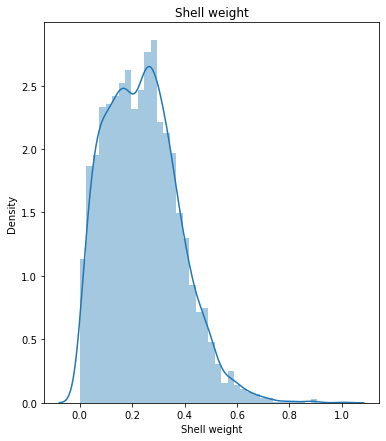

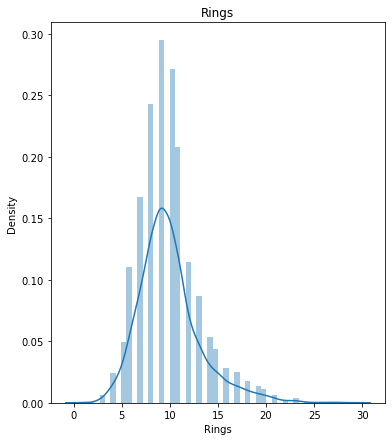

In [6]:
for col in abalone.columns:
    plt.figure(figsize=(6,7))
    plt.subplot()
    sns.distplot(abalone[col])
    plt.title(col)

From the above univariate analysis of individual collumns it is seen that most of the collumns are not normally distributed. so removal of skewness ios needed.

In [7]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


<AxesSubplot:>

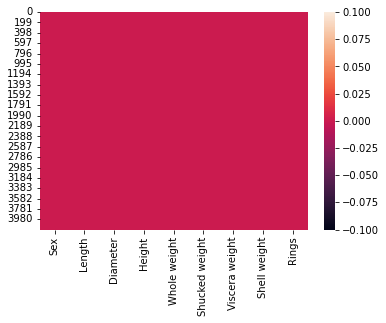

In [8]:
sns.heatmap(abalone.isnull())

From the above information and heatmap it is clear that no null value is present in the above dataset.

In [9]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From this statistical description it is shown that mean is greater than Median in some collumns. There is a large difference between 75% and Max values in some collumns like height , Shucked weight .So there might be a chance of having outliers present in these collumns.

In [10]:
abalone.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


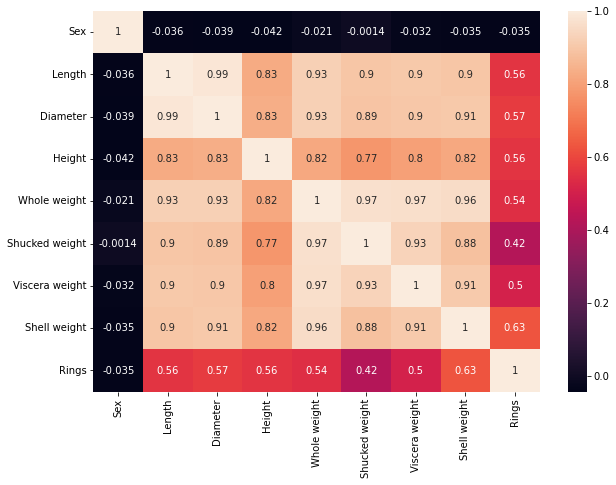

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(abalone.corr(),annot =True)
plt.show()

From the above correlation values and heatmap it can be seen that some collumns like Shucked weight,Viscera weight and Length , , Diameter are highly correlated with each other . The output variable , Rings is highly correlated with shell weight .

In [12]:
abalone["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [13]:
import statsmodels.api as sm
import scipy
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
x = abalone.iloc[:,:-1]
x.shape

(4177, 8)

In [17]:
y = abalone.iloc[:,-1]
y.shape

(4177,)

Here we have splitted data into "x" and "y" that is input variable and output variable

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(x)
xc=pd.DataFrame(xc)
xc.columns=x.columns
xc

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,1.151980,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,-1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


Here we have scaled the data for better prediction.

In [19]:
xc.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
dtype: object

all the data types are float data types.

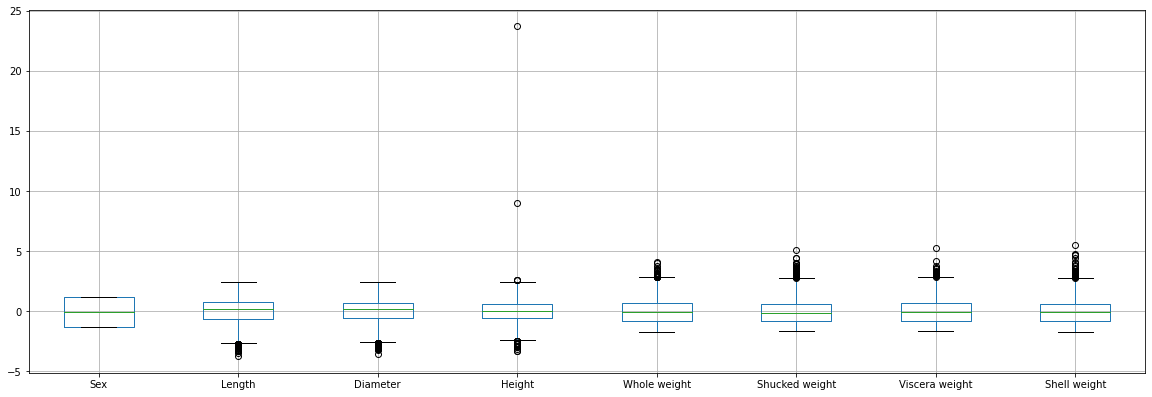

In [20]:
xc.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Here we can see that outliers are present in the data set . So we need to remove the outliers.

In [21]:
xc.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

Here we can see that skewness is present in the input variables. so removal of skewness is needed.

In [22]:
import sklearn
from sklearn.preprocessing import power_transform
xt=power_transform(xc, method="yeo-johnson")
xt=pd.DataFrame(xt)
xt.columns=xc.columns
xt

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.168497,-0.684901,-0.557364,-1.112807,-0.599328,-0.552928,-0.701239,-0.596247
1,1.168497,-1.362981,-1.356554,-1.252475,-1.344919,-1.312173,-1.333655,-1.331550
2,-1.260454,-0.095854,-0.015826,-0.053715,-0.213843,-0.374494,-0.255680,-0.098715
3,1.168497,-0.789979,-0.557364,-0.307340,-0.594429,-0.604353,-0.553907,-0.552875
4,-0.102869,-1.479784,-1.428218,-1.535804,-1.400633,-1.376867,-1.447668,-1.477403
...,...,...,...,...,...,...,...,...
4172,-1.260454,0.228312,0.327789,0.654101,0.236269,0.197169,0.636077,0.194658
4173,1.168497,0.479017,0.209585,-0.053715,0.391302,0.495607,0.434702,0.276268
4174,1.168497,0.583415,0.638116,1.515790,0.775196,0.831931,1.004906,0.594346
4175,-1.260454,0.854087,0.767838,0.309207,0.630453,0.852197,0.807720,0.516552


In [23]:
xt.skew()

Sex              -0.043332
Length           -0.020964
Diameter         -0.021702
Height            0.617717
Whole weight      0.066262
Shucked weight    0.074087
Viscera weight    0.068330
Shell weight      0.070536
dtype: float64

Here we have used yeo_johnson method to remove the skewness , after applying we can see that most of the skewness has been removed

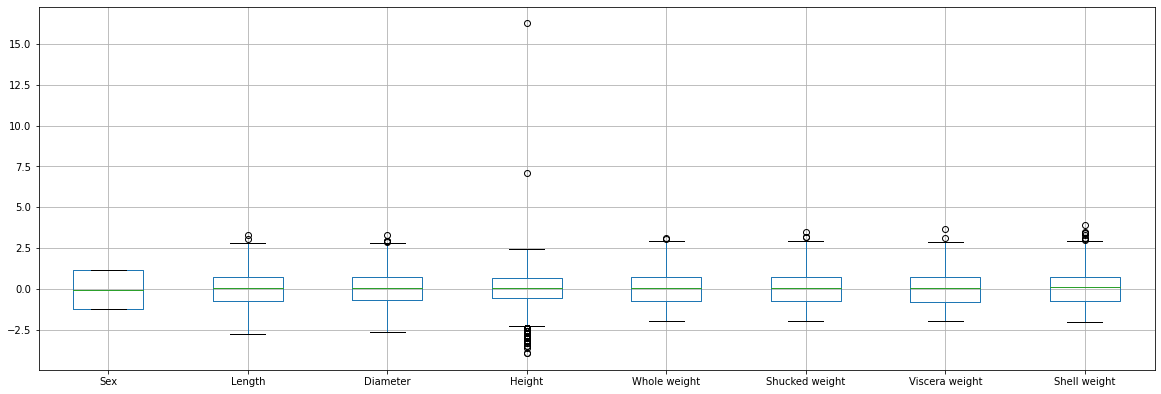

In [24]:
xt.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

After removing the outliers and skewness we have plotted the boxplot and have seen that a few outliers are present but that can be ignored.

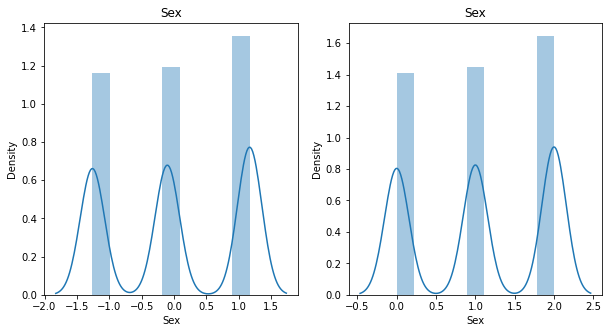

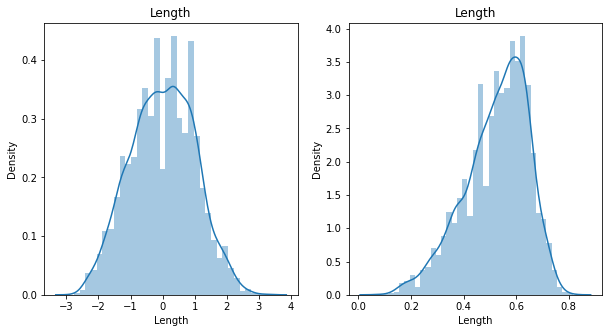

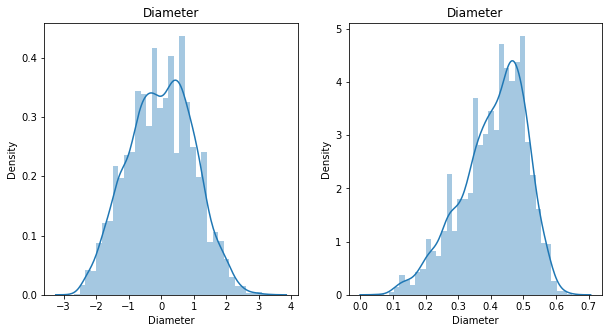

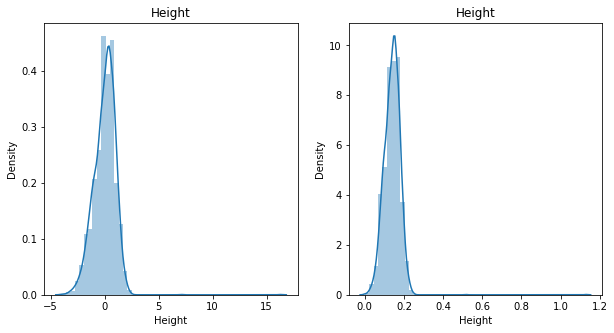

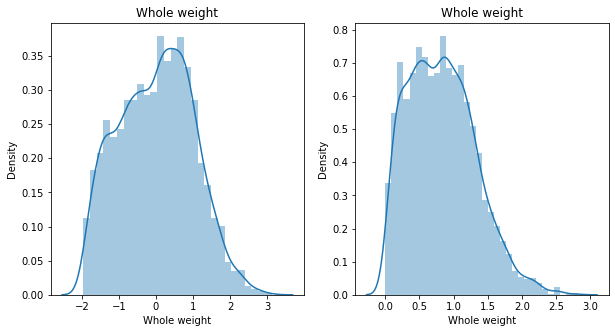

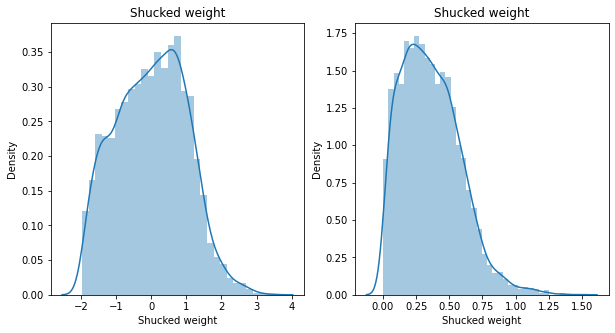

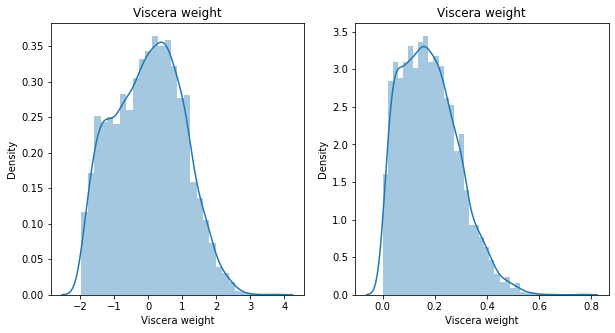

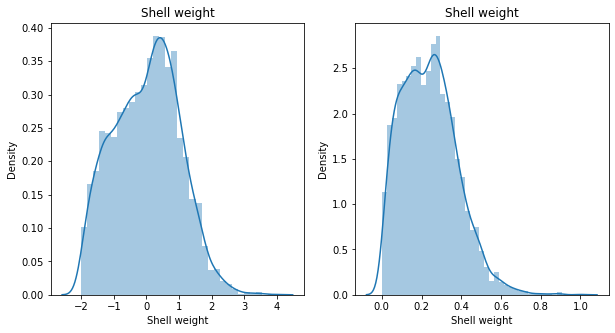

In [25]:
for col in xt.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(xt[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x[col])
    plt.title(col)

After removing the skewness we have compared here the univariate analysis of different collumns .Now we can see that most of the collumns are normally distributed.

In [26]:
def calc_vif(xt):
    vif = pd.DataFrame()
    vif["variables"] = xt.columns
    vif["V_I_F"] = [variance_inflation_factor(xt.values,i) for i in range(xt.shape[1])]
    return(vif)

In [27]:
calc_vif(xt)

,variables,V_I_F
0,Sex,1.010755
1,Length,35.638264
2,Diameter,34.570630
3,Height,4.541873
4,Whole weight,132.435961
5,Shucked weight,36.006860
6,Viscera weight,22.466343
7,Shell weight,28.023104


Here we have used vif method to theck if there is any multi co linearity present in the input variable, and we can see that Whole weight has high multi colinearity , so we have decided to drop it .

In [28]:
xt.drop(["Whole weight"],axis=1,inplace=True)
xt.head()

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,1.168497,-0.684901,-0.557364,-1.112807,-0.552928,-0.701239,-0.596247
1,1.168497,-1.362981,-1.356554,-1.252475,-1.312173,-1.333655,-1.331550
2,-1.260454,-0.095854,-0.015826,-0.053715,-0.374494,-0.255680,-0.098715
3,1.168497,-0.789979,-0.557364,-0.307340,-0.604353,-0.553907,-0.552875
4,-0.102869,-1.479784,-1.428218,-1.535804,-1.376867,-1.447668,-1.477403


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
dtr = DecisionTreeRegressor()
svr= SVR()
knr=KNeighborsRegressor()
from sklearn.model_selection import train_test_split

In [37]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.2,random_state=i)
    dtr.fit(x_train,y_train)
    preddtr=dtr.predict(x_test)
    acc=accuracy_score(y_test,preddtr)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.23803827751196172 on random state 26


In [43]:
score=cross_val_score(dtr,x_train,y_train,cv=5)
score.mean()

0.11712865014126968

In [41]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.2,random_state=i)
    svr.fit(x_train,y_train)
    predsvr=svr.predict(x_test)
    acc=svr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.5563364973960032 on random state 165


In [44]:
score=cross_val_score(svr,x_train,y_train,cv=5)
score.mean()

0.5381082475084169

In [40]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.2,random_state=i)
    knr.fit(x_train,y_train)
    predknr=knr.predict(x_test)
    acc=knr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.6721641872511899 on random state 165


In [45]:
score=cross_val_score(knr,x_train,y_train,cv=5)
score.mean()

0.4725108406499891

In [38]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
maxr2_score=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2=r2_score(y_test,predlr)
    if r2 > maxr2_score:
        maxr2_score=r2
        maxrs=i
print("best accuracy score is",maxr2_score,"on random state",maxrs)

best accuracy score is 0.5687658612667881 on random state 81


In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x_train,y_train,cv=5)
score.mean()

0.5245211116281464

In [46]:
maxacc=0
maxrs=0
from sklearn.ensemble import RandomForestRegressor
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.2,random_state=i)
    rfc=RandomForestRegressor()
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc=rfc.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9371758709379863 on random state 92


In [47]:
score=cross_val_score(rfc,x_train,y_train,cv=5)
score.mean()

0.5223967407170758

After applying different models we can see that RandomForestRegressor has worked the best. so we are selecting this model for prediction.

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"],"max_depth":[1,2,3,4,5,6,7,8],"criterion":["squared_error", "absolute_error", "poisson"]}
gscv=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring="accuracy")
gscv.fit(x_train,y_train)
gscv.best_params_
gscv.best_estimator_

RandomForestRegressor(max_depth=1)

In [51]:
gscv.best_estimator_

RandomForestRegressor(max_depth=1)

In [52]:
gscvpred=gscv.best_estimator_.predict(x_test)

In [55]:
print(gscv.best_estimator_.score(x_train,y_train))

0.3024430385193838


In [56]:
import joblib
joblib.dump(rfc,"abalone.pkl")

['abalone.pkl']